In [49]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('./housing.csv')
print(df.head(2))


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  


In [36]:
# Print the number of rows in the DataFrame
print(f"Number of rows: {len(df)}")
print(f"DataFrame shape (rows, columns): {df.shape}") # Return a tuple (rows, columns)
# Get basic info about the DataFrame
print(f"\nDataFrame info:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Total elements: {df.size}") # number of elements from all columns

Number of rows: 20640
DataFrame shape (rows, columns): (20640, 10)

DataFrame info:
Rows: 20640, Columns: 10
Total elements: 206400


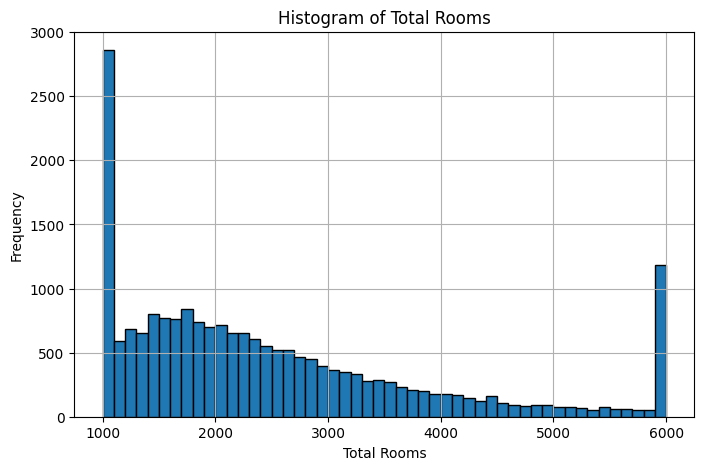

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['total_rooms'].hist(bins=50, edgecolor='black')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rooms')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
# Clip total_rooms to be between 1,000 and 6000
df['total_rooms'] = np.clip(df['total_rooms'], 1000, 6000)
print(df['total_rooms'].describe())

count    20640.000000
mean      2502.360514
std       1386.068526
min       1000.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max       6000.000000
Name: total_rooms, dtype: float64


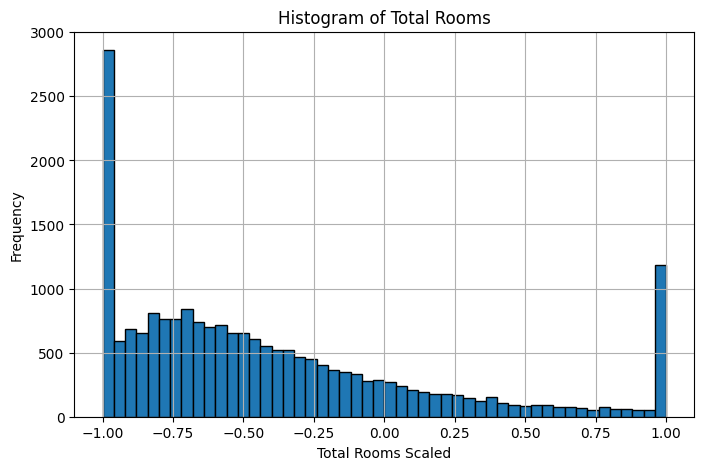

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['total_rooms_scaled'].hist(bins=50, edgecolor='black')
plt.xlabel('Total Rooms Scaled')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rooms')
plt.grid(True)
plt.show()

In [61]:
scaler = MinMaxScaler(feature_range=(-1, 1), clip=True) 
# Nothing changes because the training data define the min/max themselves, 
#so every scaled value is already inside [-1 , 1]
df['total_rooms_scaled'] = scaler.fit_transform(df[['total_rooms']])
print(df.head(2))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0       1000.0           129.0   
1    -122.22     37.86                21.0       6000.0          1106.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   

   total_rooms_scaled  
0                -1.0  
1                 1.0  


In [29]:
print(df.tail())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAN

In [41]:
# simulate a new observation with an outlier
new = pd.DataFrame({'total_rooms': [999_999]})
print(new.tail())
print("With clip=True :", scaler.transform(new))   # → exactly 1
scaler.clip = False                                # turn off
print("With clip=False:", scaler.transform(new))   # → >1, outside the range


   total_rooms
0       999999
With clip=True : [[1.]]
With clip=False: [[49.86713465]]


In [47]:
df = pd.concat([df, new], ignore_index=True) 
print(df.tail())  # Show the last few rows to confirm the addition

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   
20640        NaN       NaN                 NaN     999999.0             NaN   

       population  households  median_income  median_house_value  \
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   
20640         NaN         NaN            NaN                 NaN   

      ocean_proximity  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAN